In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

In [3]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.linspace(0, len(loss), (len(loss) // 10) + 1))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(title=not_fixed_param, fontsize=10)
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [4]:
def plot_fixed(results: pd.DataFrame, epochs: np.int_ = 50, hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size} and epochs == {epochs}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate} and epochs == {epochs}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate} and epochs == {epochs}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

In [5]:
results: pd.DataFrame = pd.read_json("../data/results.json")

# Convergência do erro empírico

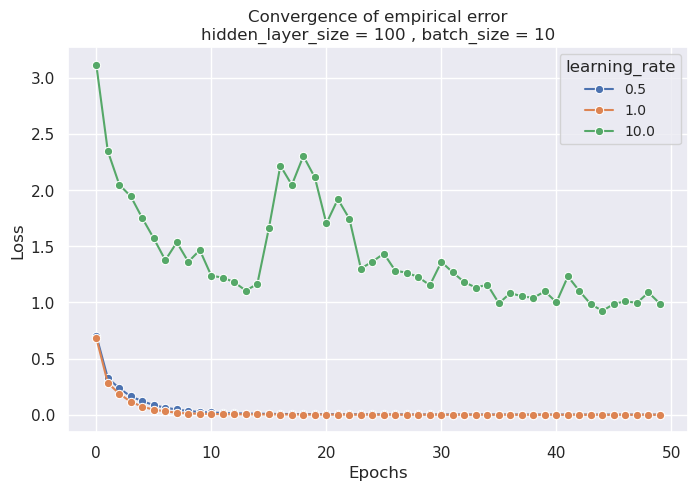

In [6]:
plot_fixed(results=results, hidden_layer_size=100, batch_size=10, learning_rate=None)

In [ ]:
plot_fixed(results=results, hidden_layer_size=100, batch_size=10, learning_rate=None)

# Trade-off entre número de unidades da camada oculta e algoritmo de cálculo de gradiente

In [7]:
results.head()

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,epochs,hidden_layer_size,batch_size,learning_rate,history
0,0.894,"[0.956521739130434, 0.958333333333333, 0.87755...","[0.936170212765957, 0.958333333333333, 0.87755...","[0.9462365591397841, 0.958333333333333, 0.8775...","[[44, 0, 1, 0, 0, 1, 1, 0, 0, 0], [0, 46, 1, 0...",42,0.1,10,25,1,0.5,"{'loss': [1.072609663009643, 0.867266058921814..."
1,0.772,"[0.7843137254901961, 1.0, 0.9743589743589741, ...","[0.851063829787234, 0.6875, 0.7755102040816321...","[0.816326530612244, 0.8148148148148141, 0.8636...","[[40, 0, 0, 0, 0, 3, 1, 0, 0, 3], [0, 33, 0, 0...",42,0.1,10,25,1,1.0,"{'loss': [1.980804681777954, 2.138478279113769..."
2,0.110,"[0.0, 0.0, 0.0, 0.09812108559498901, 0.3809523...","[0.0, 0.0, 0.0, 1.0, 0.148148148148148, 0.0, 0...","[0.0, 0.0, 0.0, 0.1787072243346, 0.21333333333...","[[0, 0, 0, 39, 8, 0, 0, 0, 0, 0], [0, 0, 0, 48...",42,0.1,10,25,1,10.0,"{'loss': [11.566798210144043, 18.0246219635009..."
3,0.914,"[0.9787234042553191, 0.9019607843137251, 0.884...","[0.9787234042553191, 0.958333333333333, 0.9387...","[0.9787234042553191, 0.9292929292929291, 0.910...","[[46, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 46, 1, 0...",42,0.1,10,25,10,0.5,"{'loss': [0.7487655282020561, 0.35032254457473..."
4,0.914,"[1.0, 0.9574468085106381, 0.976744186046511, 0...","[1.0, 0.9375, 0.8571428571428571, 0.9148936170...","[1.0, 0.9473684210526311, 0.9130434782608691, ...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 45, 0, 2...",42,0.1,10,25,10,1.0,"{'loss': [0.676840364933013, 0.346251606941223..."


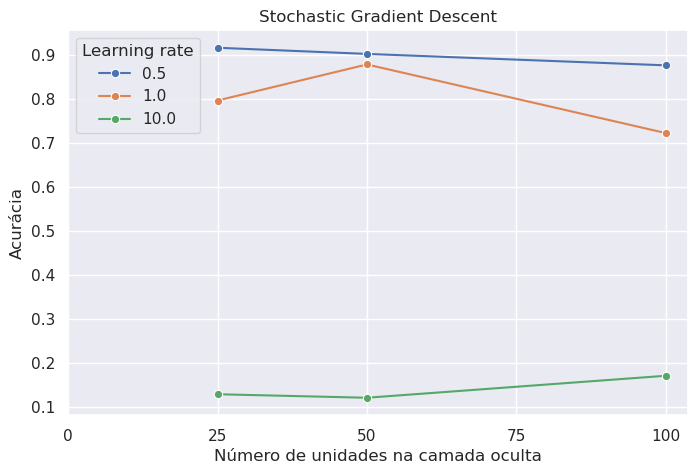

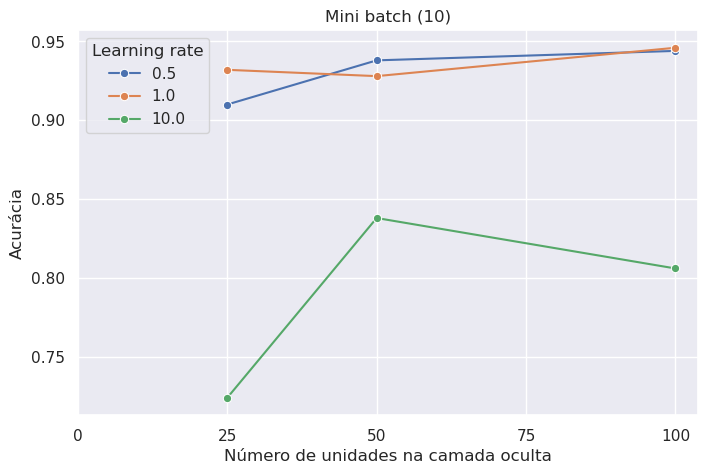

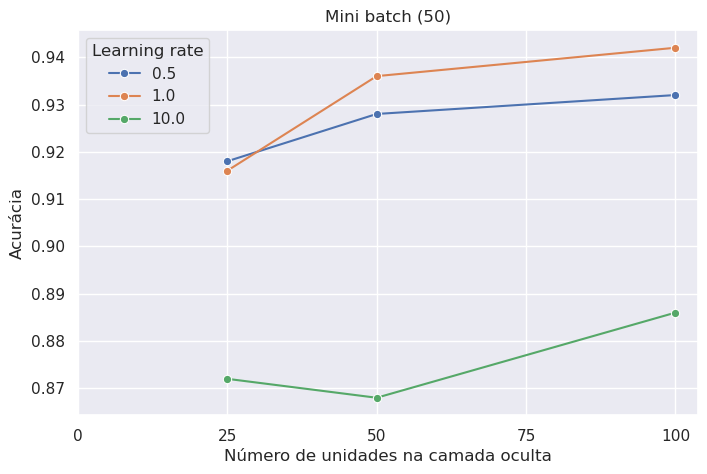

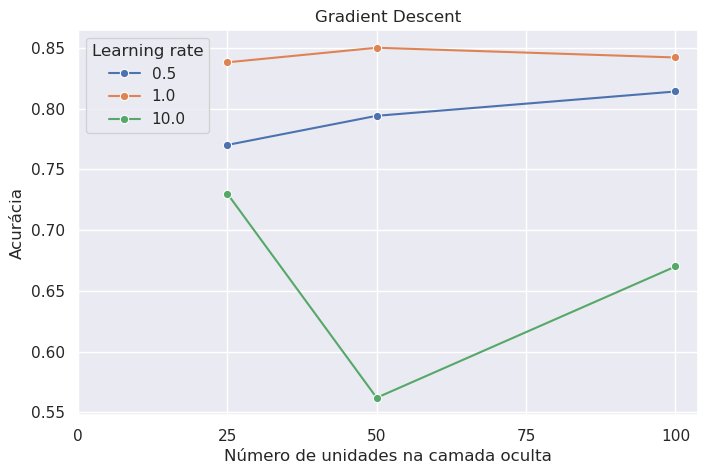

In [8]:
for batch_size in results.batch_size.unique():    
    for learning_rate in results.learning_rate.unique():
        queried: pd.DataFrame = results.query(f"learning_rate == {learning_rate} and epochs==50 and batch_size=={batch_size}").copy()
        sns.lineplot(data=queried.accuracy_score, x=queried.hidden_layer_size, y=queried.accuracy_score, markers=True, marker="o", label=f"{learning_rate}")
        plt.xlabel("Número de unidades na camada oculta")
        plt.xticks(np.arange(0, 125, 25))
        plt.ylabel("Acurácia")
        plt.legend(title="Learning rate")
        title: str = ""
        nickname: str = ""
        if batch_size == 1:
            title = f"Stochastic Gradient Descent"
            nickname = "SGD"
        elif batch_size == 10 or batch_size == 50:
            title = f"Mini batch ({batch_size})"
            nickname = f"MB{batch_size}"
        else:
            title = f"Gradient Descent"
            nickname = "GD"
        plt.title(title)
    plt.savefig(f"../report/images/tradeoff/{nickname}.jpg")
    plt.show()